In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Problem Statement

In [ ]:
To predict House Price in Boston City by using Supervised Machine learning considering as a regression problem.

Independent Variable >> ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Dependent Variable >> ['PRICE']

## Data Gathering

In [3]:
boston = load_boston()
dir(boston)

C:\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 3. Exploratory Data Analysis (EDA)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
df.shape

(506, 14)

In [10]:
row_count = df.shape[0]
row_count

506

In [11]:
column_count = df.shape[1]
column_count

14

In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Detect Outliers by:
    1. Boxplot
    2. Z-score
    3. IQR

## 4. Feature Engineering

Imputation of Missing values
Imputation of Outliers
Scaling --> distance based algorithm
Binning --> Continous data into categorical data
Encoding --> Categorical data into Numerical

## 5. Feature Selection

### 1. Linearity

In [12]:
df.corr() # pearson

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot: >

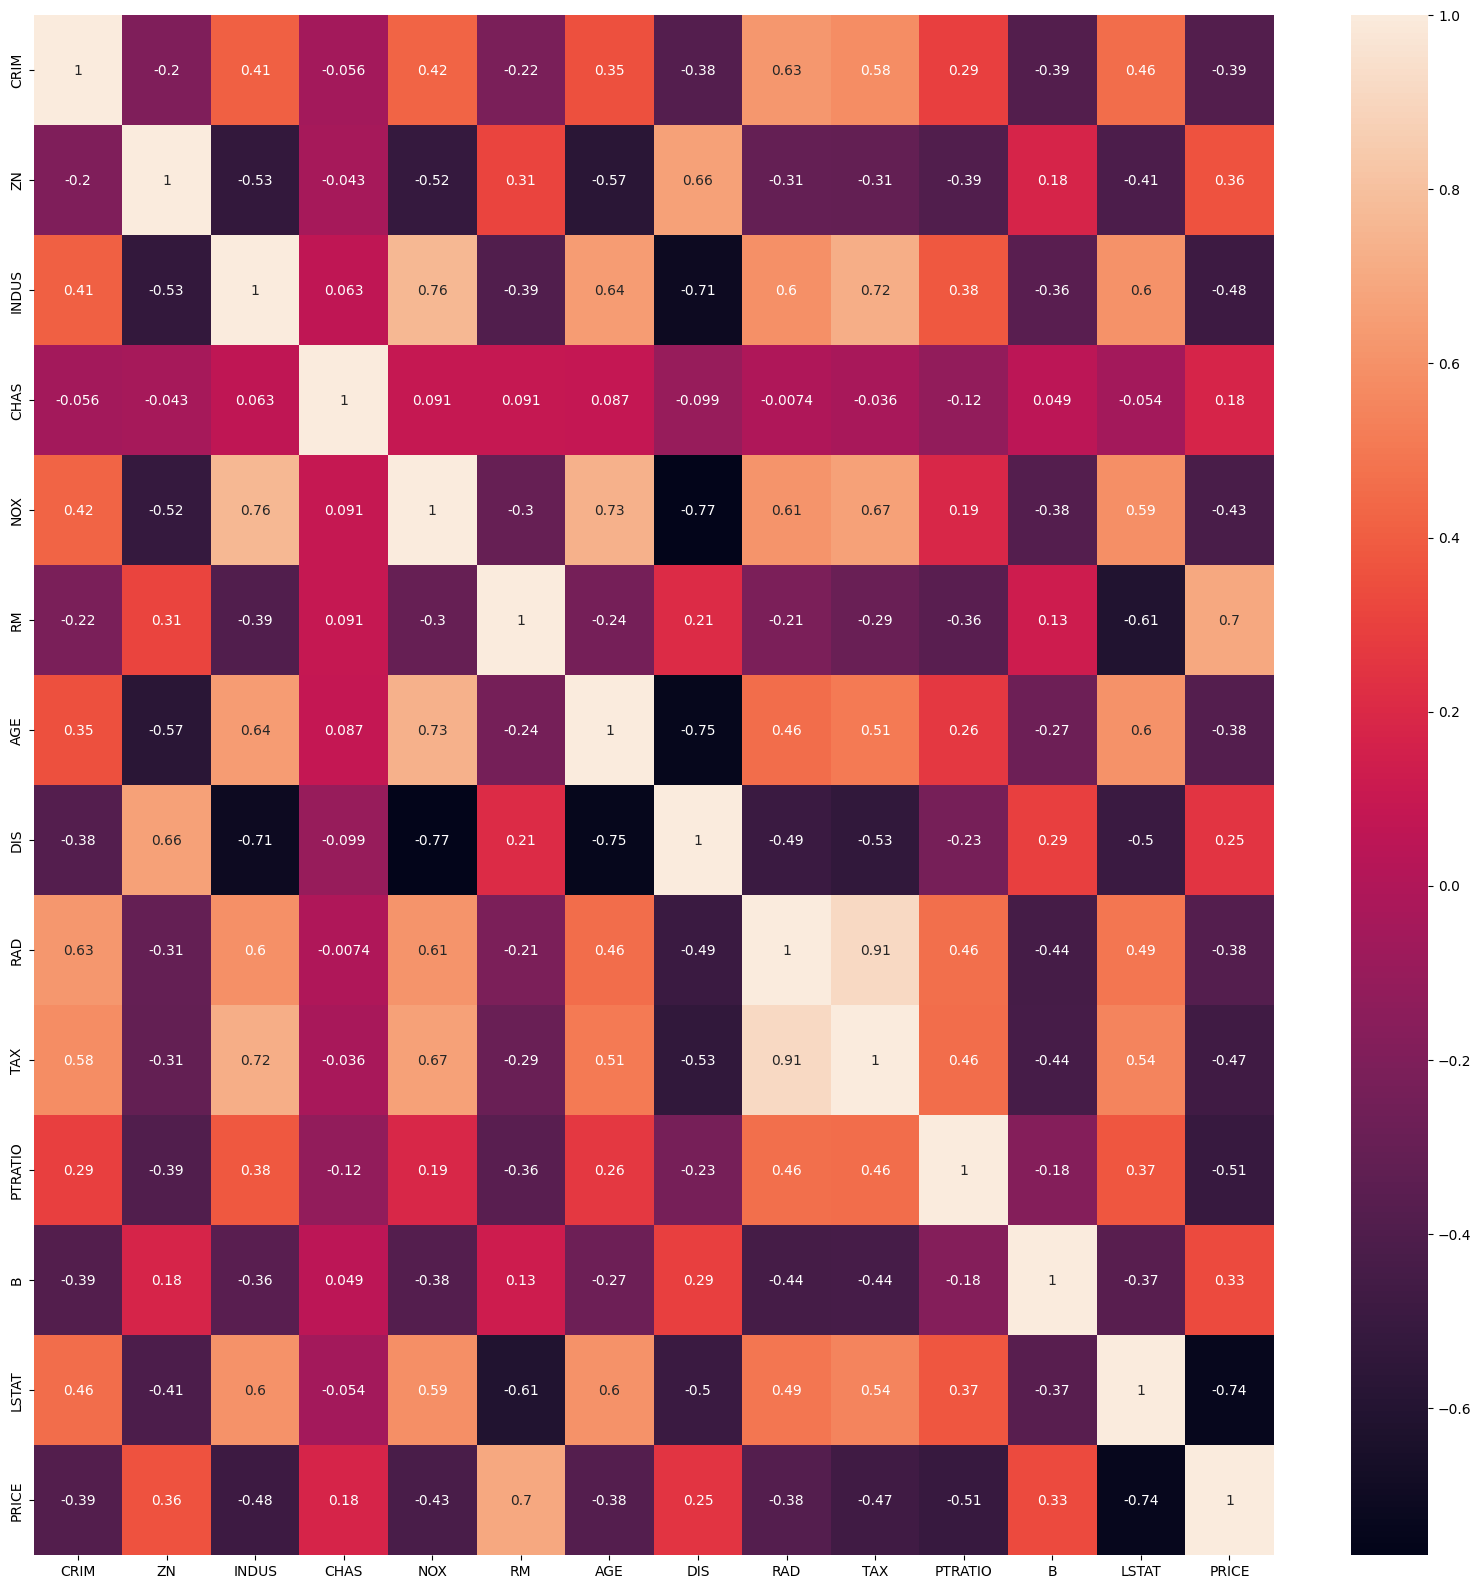

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot: >

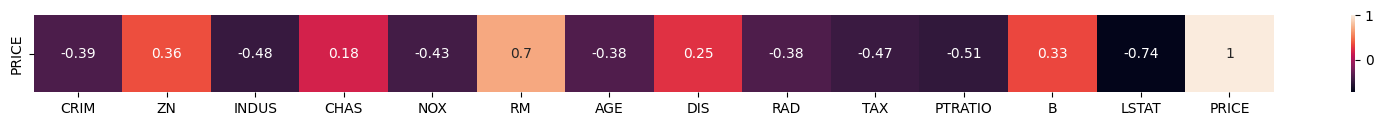

In [16]:
plt.figure(figsize=(20,1))
sns.heatmap(df.corr().tail(1), annot=True)

### 2. No Multicolinearity

In [ ]:
VIF >> Variance Inflation Factor

In [23]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [24]:
df1 = df.drop('PRICE', axis=1)
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


<AxesSubplot: >

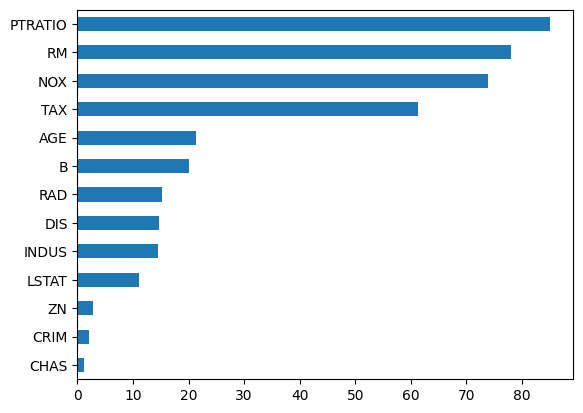

In [34]:
vif_list = []

for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list, index=df1.columns)
s1.sort_values().plot(kind = 'barh')

In [36]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


## 6. Model Building

In [ ]:
x >> independent variables >> dataframe >> 2-D array
y >> dependent variable >> Series >> 1-D array

In [15]:
x = df.drop('PRICE', axis=1)
y = df['PRICE']

#### 1. Train Test Split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=12)
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
266,0.78570,20.0,3.97,0.0,0.6470,7.014,84.6,2.1329,5.0,264.0,13.0,384.07,14.79
501,0.06263,0.0,11.93,0.0,0.5730,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
297,0.14103,0.0,13.92,0.0,0.4370,5.790,58.0,6.3200,4.0,289.0,16.0,396.90,15.84
388,14.33370,0.0,18.10,0.0,0.7000,4.880,100.0,1.5895,24.0,666.0,20.2,372.92,30.62
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0.10612,30.0,4.93,0.0,0.4280,6.095,65.1,6.3361,6.0,300.0,16.6,394.62,12.40
253,0.36894,22.0,5.86,0.0,0.4310,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54
390,6.96215,0.0,18.10,0.0,0.7000,5.713,97.0,1.9265,24.0,666.0,20.2,394.43,17.11
155,3.53501,0.0,19.58,1.0,0.8710,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02


In [17]:
y_train

266    30.7
501    22.4
297    20.3
388    10.2
477    12.0
       ... 
241    20.1
253    42.8
390    15.1
155    15.6
331    17.1
Name: PRICE, Length: 404, dtype: float64

In [18]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
334,0.03738,0.0,5.19,0.0,0.515,6.310,38.5,6.4584,5.0,224.0,20.2,389.40,6.75
394,13.35980,0.0,18.10,0.0,0.693,5.887,94.7,1.7821,24.0,666.0,20.2,396.90,16.35
404,41.52920,0.0,18.10,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38
236,0.52058,0.0,6.20,1.0,0.507,6.631,76.5,4.1480,8.0,307.0,17.4,388.45,9.54
307,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,7.75223,0.0,18.10,0.0,0.713,6.301,83.7,2.7831,24.0,666.0,20.2,272.21,16.23
263,0.82526,20.0,3.97,0.0,0.647,7.327,94.5,2.0788,5.0,264.0,13.0,393.42,11.25
433,5.58107,0.0,18.10,0.0,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19,16.22
275,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98


In [19]:
y_test

334    20.7
394    12.7
404     8.5
236    25.1
307    28.2
       ... 
458    14.9
263    31.0
433    14.3
275    32.0
483    21.8
Name: PRICE, Length: 102, dtype: float64

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


#### 2. Create instance of the model

In [21]:
model = LinearRegression()

#### 3. Model Training

In [22]:
model.fit(x_train, y_train) # gradient descent 

LinearRegression()

In [23]:
model.coef_

array([-9.86523958e-02,  4.67429816e-02,  3.03589576e-02,  3.01614165e+00,
       -1.81186387e+01,  3.73325846e+00,  1.46988182e-02, -1.37756896e+00,
        3.24385909e-01, -1.35548339e-02, -8.20105607e-01,  9.09573893e-03,
       -5.61054872e-01])

In [24]:
model.intercept_

34.08963391356931

## 7. Model Evaluation

In [25]:
y_pred = model.predict(x_test)
y_pred[:5]   # prdicted values

array([21.91255819, 18.30810393,  7.50219553, 30.56672721, 32.91643787])

In [26]:
print(y_test[:5])  # Actual Values

334    20.7
394    12.7
404     8.5
236    25.1
307    28.2
Name: PRICE, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_1204\1167655636.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_test[:5])  # Actual Values


In [27]:
y_pred[40:45]

array([17.88351719, 24.77714991, 21.44933437, 33.97806095, 18.94344894])

In [28]:
print(y_test[40:45])

207    22.5
42     25.3
71     21.7
40     34.9
422    20.8
Name: PRICE, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_1204\3590117852.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_test[40:45])


#### 1. Residual

In [29]:
residual = y_test - y_pred
residual

334   -1.212558
394   -5.608104
404    0.997804
236   -5.466727
307   -4.716438
         ...   
458   -2.537046
263   -2.868437
433   -3.001660
275   -1.742723
483    0.701003
Name: PRICE, Length: 102, dtype: float64

#### 2. MSE

In [30]:
mse = np.sum(residual ** 2) / 102
mse

20.55805163422978

In [31]:
# Model Evaluation for Testing Data

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_test, y_pred)
print("R Squared Value :",r_squared_value)

r2 = model.score(x_test, y_test)
print("Direct R Squared Value :",r2)

adj_r2  = 1 - (((1 - r_squared_value) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

Mean Sqaured Error : 20.55805163422978
Root Mean Sqaured Error : 4.53409876758654
Mean Absolute Error : 3.274078952173331
R Squared Value : 0.7484031678924552
Direct R Squared Value : 0.7484031678924552
Adjusted R Squared Value : 0.7112354540583861


In [32]:
# Model Evaluation for Training Data

y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_train, y_pred_train)
print("R Squared Value :",r_squared_value)

# Direct calculation
r2 = model.score(x_train, y_train)
print("Direct R Squared Value :",r2)

adj_r2  = 1 - (((1 - r_squared_value) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

Mean Sqaured Error : 22.427871876091487
Root Mean Sqaured Error : 4.735807415435248
Mean Absolute Error : 3.312818469260124
R Squared Value : 0.736159238423712
Direct R Squared Value : 0.736159238423712
Adjusted R Squared Value : 0.7273645463711691


In [33]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [34]:
x = df.drop('PRICE', axis=1)
y = df['PRICE']

In [35]:
df.iloc[:, :3]

,CRIM,ZN,INDUS
0,0.00632,18.0,2.31
1,0.02731,0.0,7.07
2,0.02729,0.0,7.07
3,0.03237,0.0,2.18
4,0.06905,0.0,2.18
...,...,...,...
501,0.06263,0.0,11.93
502,0.04527,0.0,11.93
503,0.06076,0.0,11.93
504,0.10959,0.0,11.93


### Comparison between R2 and Adjusted R2

In [36]:
r2_list = []
adj_r2_list = []

for i in range(1, df.shape[1]):
    x = df.iloc[:, :i]
    
    model = LinearRegression()
    model.fit(x,y)
    
    r2 = model.score(x,y)
    r2_list.append(r2)
    
    adj_r2  = 1 - (((1 - r2) * (x.shape[0] - 1)) / (x.shape[0] - x.shape[1] - 1))
    adj_r2_list.append(adj_r2)
    
    
result = pd.DataFrame()
result['Columns'] = x.columns
result['R2 Score'] = r2_list
result['Adj R2 Score'] = adj_r2_list
result

,Columns,R2 Score,Adj R2 Score
0,CRIM,0.150780,0.149096
1,ZN,0.233988,0.230943
2,INDUS,0.293714,0.289493
3,CHAS,0.329528,0.324175
4,NOX,0.331313,0.324626
5,RM,0.587377,0.582416
6,AGE,0.589490,0.583720
7,DIS,0.631149,0.625212
8,RAD,0.631948,0.625269
9,TAX,0.639663,0.632383


## Assumptions of Linear regression

1. Linearity  # df.corr() --> sns.heatmap(), sns.pairplot()
2. No Multicolinearity # vif ,  # df.corr() --> sns.heatmap(), sns.pairplot()
3. Normality of residual
4. Homoscadasticity

# Normality of Residual

In [38]:
Residual = y_train - y_pred_train
Residual

266     0.287394
501    -1.420013
297     0.976169
388     3.755341
477     0.235758
         ...    
241    -3.657428
253    12.905235
390    -2.448848
155    -4.223965
331    -2.395826
Name: PRICE, Length: 404, dtype: float64

### 1. kdeplot

<AxesSubplot: xlabel='PRICE', ylabel='Density'>

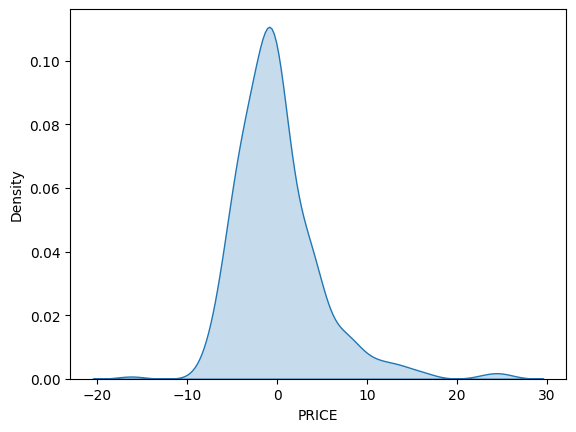

In [50]:
sns.kdeplot(Residual, fill=True)

In [55]:
# Mean
mean = Residual.mean()
print("Mean -->",mean)

median = Residual.median()
print("median -->",median)

mode = Residual.mode()[0]
print("Mode -->",mode)

Mean --> 2.5414214187459028e-14
median --> -0.6749062210509544
Mode --> -16.224552910698463


C:\Users\hp\AppData\Local\Temp\ipykernel_16316\3578339882.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Residual)


<AxesSubplot: xlabel='PRICE', ylabel='Density'>

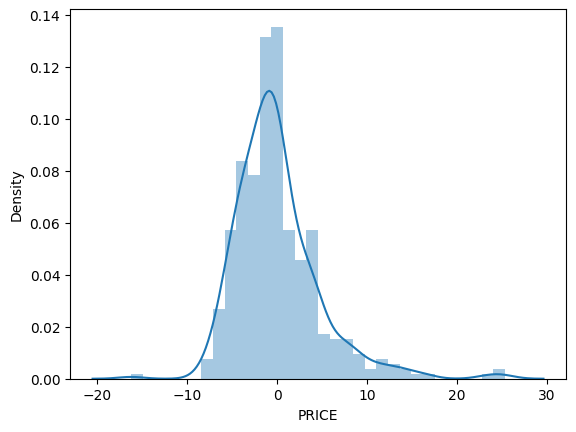

In [56]:
sns.distplot(Residual)

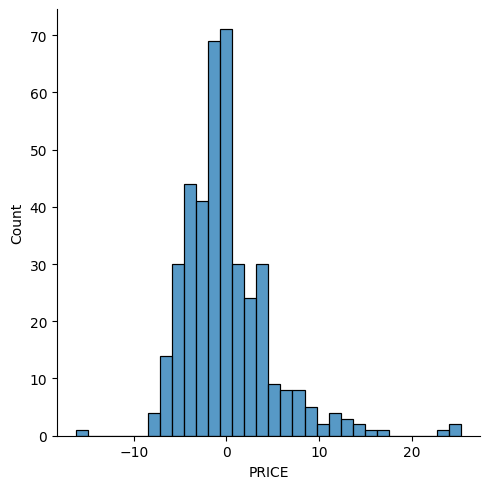

In [57]:
sns.displot(Residual)

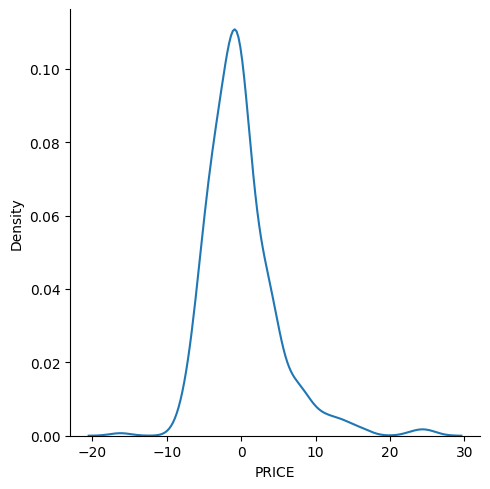

In [59]:
sns.displot(Residual, kind='kde')

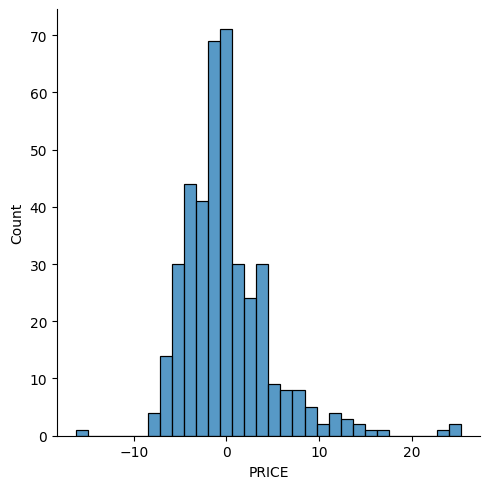

In [60]:
sns.displot(Residual, kind='hist')

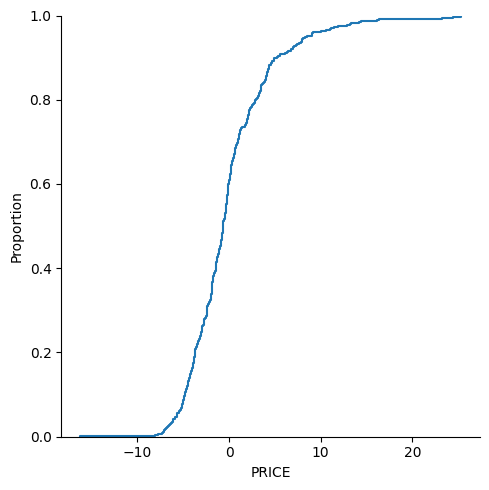

In [61]:
sns.displot(Residual, kind='ecdf')

<AxesSubplot: xlabel='PRICE', ylabel='Count'>

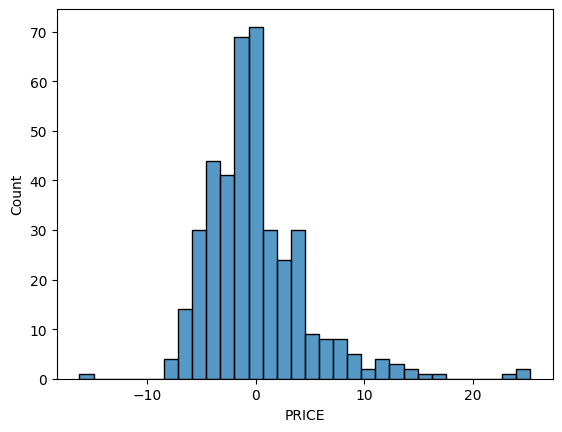

In [58]:
sns.histplot(Residual)

<AxesSubplot: xlabel='AGE', ylabel='Density'>

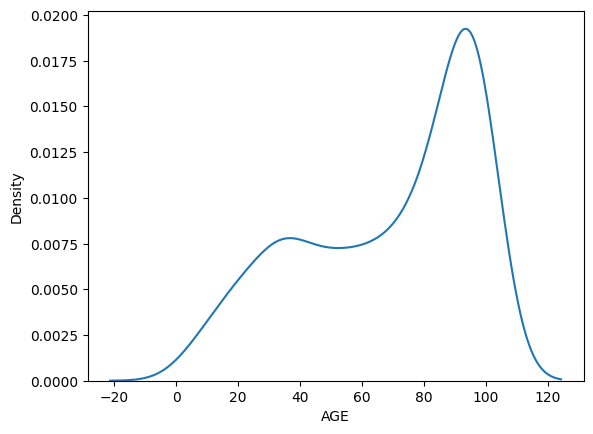

In [64]:
sns.kdeplot(df['AGE'])

In [66]:
# Mean
mean = df['AGE'].mean()
print("Mean -->",mean)

median = df['AGE'].median()
print("median -->",median)

mode = df['AGE'].mode()[0]
print("Mode -->",mode)

skew = df['AGE'].skew()
print("Skewness -->",skew) # Negatively Skewed Distribution

Mean --> 68.57490118577076
median --> 77.5
Mode --> 100.0
Skewness --> -0.5989626398812962


In [67]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [68]:
df['NOX']

0      0.538
1      0.469
2      0.469
3      0.458
4      0.458
       ...  
501    0.573
502    0.573
503    0.573
504    0.573
505    0.573
Name: NOX, Length: 506, dtype: float64

<AxesSubplot: xlabel='NOX', ylabel='Density'>

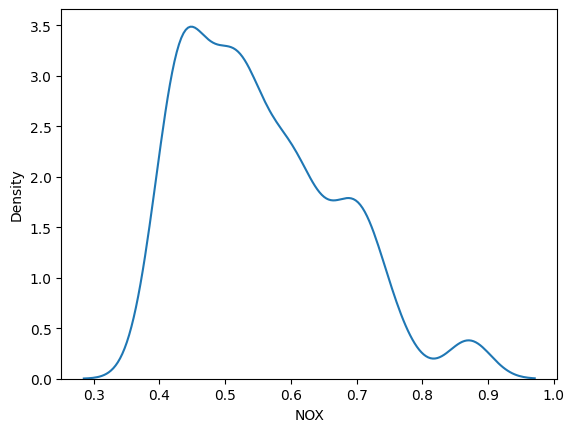

In [69]:
sns.kdeplot(df['NOX'])

In [70]:
# Mean
mean = df['NOX'].mean()
print("Mean -->",mean)

median = df['NOX'].median()
print("median -->",median)

mode = df['NOX'].mode()[0]
print("Mode -->",mode)

skew = df['NOX'].skew()
print("Skewness -->",skew) # Positively Skewed Distribution

Mean --> 0.5546950592885376
median --> 0.538
Mode --> 0.538
Skewness --> 0.7293079225348787


In [71]:
# Also import from scipy library

from scipy.stats import skew

skewness = skew(df['NOX'])
skewness

0.7271441597740319

## Hypothesis Testing

In [ ]:
Null Hypothesis: Assume that Data is Normally Distributed
    Evidence --> p_val = "Significant Value" in Hypothesis
    
    
Alternate Hypothesis: Assume that Data is not Normally Distributed
    
Range : p_val is 0 to 1
    
p_val >= 0.05  >> Null Hypothesis is True i.e. Null Hypothesis get accepted
p_val < 0.05   >> Null Hypothesis is False i.e. Null Hypothesis get rejected >> Alternate Hypothesis get accepted.

In [ ]:
Hypothesis Testing:
    Shapiro Test   # --> Mostly Preferred
    KS Test
    Normal Test

### Shapiro Test

In [39]:
from scipy.stats import shapiro

In [55]:
_ , p_val = shapiro(Residual)

print("P_Value:",p_val)

if p_val >= 0.05:
    print("Null Hypothesis is Accepted")
    print("--> Data is Normally Distributed")
    
else:
    print("Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted")
    print("Data is NOT Normally Distributed")

P_Value: 1.606465747103561e-16
Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted
Data is NOT Normally Distributed


<AxesSubplot: xlabel='PRICE', ylabel='Density'>

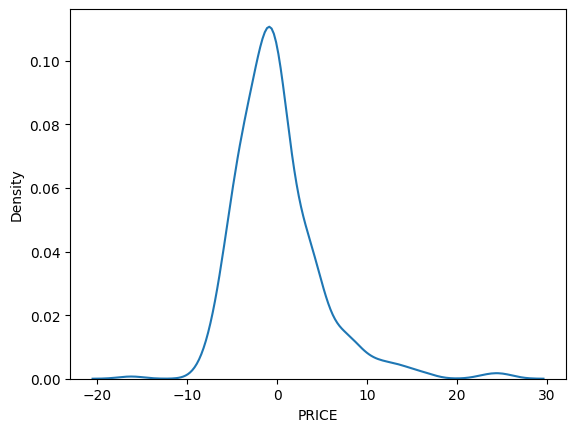

In [56]:
sns.kdeplot(Residual)

In [57]:
# Array of Normally distributed random values
array = np.random.randn(1000)

<AxesSubplot: ylabel='Density'>

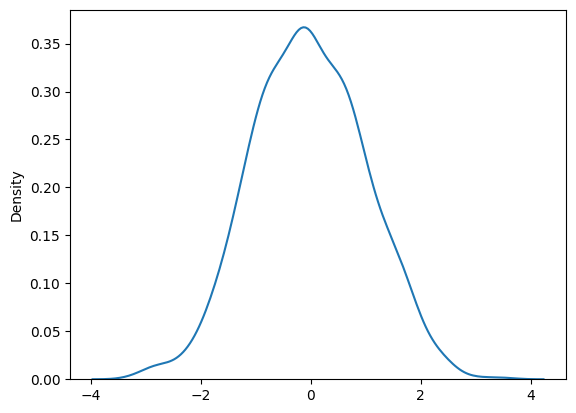

In [58]:
sns.kdeplot(array)

In [59]:
_ , p_val = shapiro(array)

print("P_Value:",p_val)

if p_val >= 0.05:
    print("Null Hypothesis is Accepted")
    print("--> Data is Normally Distributed")
    
else:
    print("Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted")
    print("Data is NOT Normally Distributed")

P_Value: 0.5645937323570251
Null Hypothesis is Accepted
--> Data is Normally Distributed


### 2. KS test

In [ ]:
Kolmogorov-Smirnov

In [60]:
from scipy.stats import kstest

In [62]:
_ , p_val = kstest(Residual, 'norm')

print("P_Value:",p_val)

if p_val >= 0.05:
    print("Null Hypothesis is Accepted")
    print("--> Data is Normally Distributed")
    
else:
    print("Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted")
    print("--> Data is NOT Normally Distributed")

P_Value: 5.8388512398865e-42
Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted
--> Data is NOT Normally Distributed


In [63]:
# Array of Normally distributed random values
array = np.random.randn(1000)

_ , p_val = kstest(array, 'norm')

print("P_Value:",p_val)

if p_val >= 0.05:
    print("Null Hypothesis is Accepted")
    print("--> Data is Normally Distributed")
    
else:
    print("Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted")
    print("--> Data is NOT Normally Distributed")

P_Value: 0.3576955696670815
Null Hypothesis is Accepted
--> Data is Normally Distributed


### 3. Normal test

In [64]:
from scipy.stats import normaltest

In [65]:
_ , p_val = normaltest(Residual)

print("P_Value:",p_val)

if p_val >= 0.05:
    print("Null Hypothesis is Accepted")
    print("--> Data is Normally Distributed")
    
else:
    print("Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted")
    print("--> Data is NOT Normally Distributed")

P_Value: 1.3211921678643172e-33
Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted
--> Data is NOT Normally Distributed


In [66]:
# Array of Normally distributed random values
array = np.random.randn(1000)

_ , p_val = normaltest(array)

print("P_Value:",p_val)

if p_val >= 0.05:
    print("Null Hypothesis is Accepted")
    print("--> Data is Normally Distributed")
    
else:
    print("Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted")
    print("--> Data is NOT Normally Distributed")

P_Value: 0.4645464404605555
Null Hypothesis is Accepted
--> Data is Normally Distributed


## QQ Plot

In [ ]:
Quantile Quantile Plot

In [67]:
import statsmodels.api as sm

<AxesSubplot: xlabel='PRICE', ylabel='Density'>

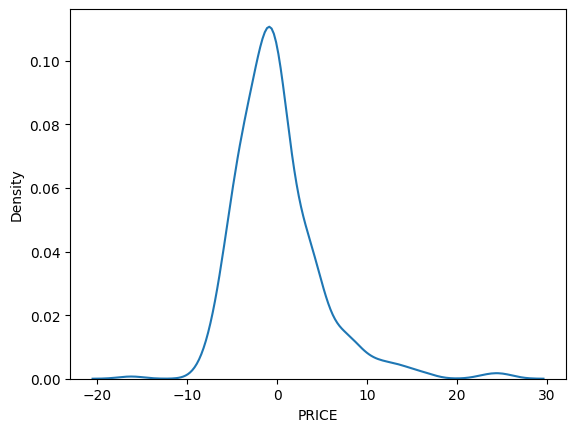

In [70]:
sns.kdeplot(Residual)

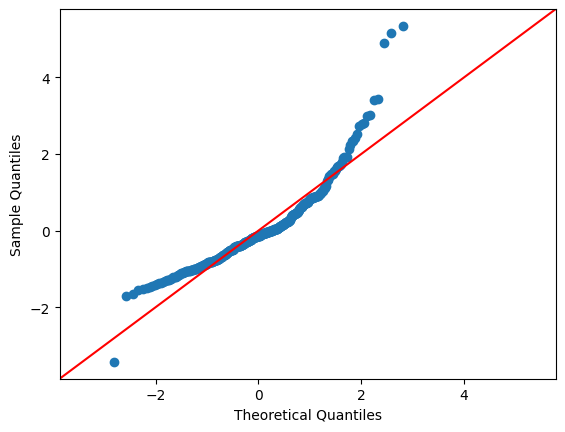

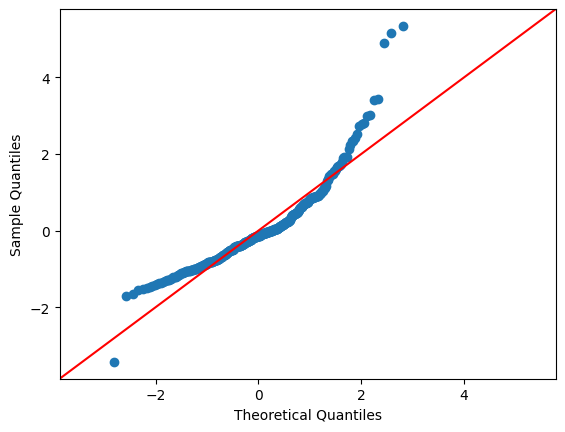

In [68]:
sm.qqplot(Residual, line = '45', fit=True)

# If 90% of datapoints are on the line --> data is Normally distributed

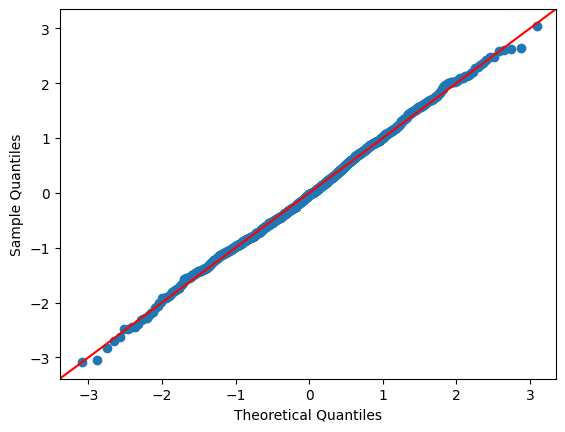

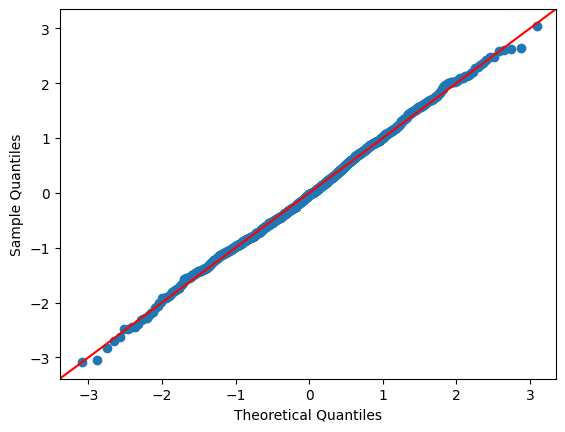

In [69]:
# Array of Normally distributed random values
array = np.random.randn(1000)

sm.qqplot(array, line = '45', fit=True)

## 4. Homoscedasticity

In [ ]:
Assumption of Constant variance
# Variance --> deviation of data from its mean value or zero value

# Checking variance of residual along fitted value (Y-Value)

Homoscedasticity --> Constant/Equal Variance

Hetroscedasticity --> Unequal Variance

We can plot graph between dependent and residual --> Scatterplot

<AxesSubplot: xlabel='PRICE', ylabel='PRICE'>

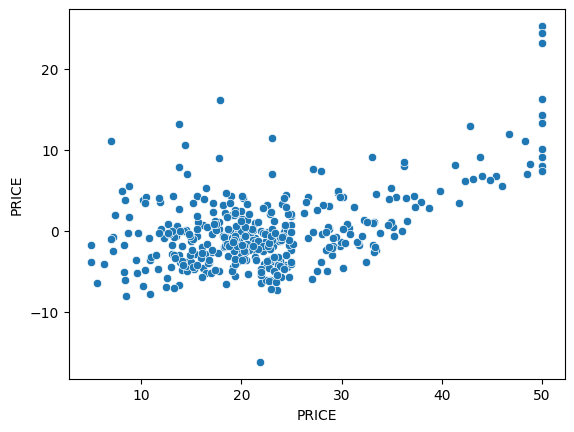

In [83]:
sns.scatterplot(x = y_train, y= Residual)

In [ ]:
# Assumptions of Linear regression
3. Normality of Residual
4. Homoscedasticity

# This two assumptions are after Model Training

### Testing on USER input

In [73]:
x_test.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
334,0.03738,0.0,5.19,0.0,0.515,6.31,38.5,6.4584,5.0,224.0,20.2,389.4,6.75


In [74]:
x_test.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [81]:
CRIM = 0.039
ZN = 0.0
INDUS = 5.35
CHAS = 0.0
NOX = 0.570
RM = 6.91
AGE = 40.5
DIS = 6.5584
RAD = 6.0
TAX = 230.0
PTRATIO = 22.2
B = 392.4
LSTAT = 6.80

test_array = np.array([CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT], ndmin = 2)

pred_price = model.predict(test_array)[0]
print("Predicted PRICE is -->", np.around(pred_price,2), "$")

Predicted PRICE is --> 21.05 $


C:\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Create Pickle File

In [82]:
import pickle

with open("linear_model.pkl", "wb") as f:
    pickle.dump(model, f)